# VAR Model in Python : Time Series Talk

https://www.youtube.com/watch?v=6Ye0CsfRDJg


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

# Read the Data

In [ ]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv',
                                  parse_dates=[0],
                                  index_col=0,
                                  date_format='%Y-%m')

In [ ]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Normalize

In [ ]:
avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()

In [ ]:
for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Take First Difference to Remove Trend

In [ ]:
ice_cream_heater_df = ice_cream_heater_df.diff().dropna()

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

# Remove Increasing Volatility

In [ ]:
annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()

In [ ]:
annual_volatility

In [ ]:
ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])

In [ ]:
ice_cream_heater_df

In [ ]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# Remove Seasonality

In [ ]:
month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()

In [ ]:
print(month_avgs)

In [ ]:
ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

In [ ]:
ice_cream_heater_df

In [ ]:
ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

In [ ]:
ice_cream_heater_df

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream'], fontsize=16)

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(ice_cream_heater_df['ice cream'])
heater, = plt.plot(ice_cream_heater_df['heater'], color='red')

for year in range(2004, 2021):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Ice Cream', 'Heater'], fontsize=16)

# PACF - Heater

In [ ]:
plot_pacf(ice_cream_heater_df['heater'])
plt.show()

## So consider an AR(2)

# Correlation between "heater" and lagged "ice cream"

In [ ]:
for lag in range(1, 14):
    heater_series = ice_cream_heater_df['heater'].iloc[lag:]
    lagged_ice_cream_series = ice_cream_heater_df['ice cream'].iloc[:-lag]
    correlation, p_value =  pearsonr(heater_series, lagged_ice_cream_series)
    print('Lag: %s'%lag)
    print(f"Correlation: {correlation} (p-value: {p_value})")
    print('------')

# Fit a VAR Model

In [ ]:
ice_cream_heater_df = ice_cream_heater_df[['ice cream', 'heater']]

In [ ]:
model = VAR(ice_cream_heater_df)

In [ ]:
model_fit = model.fit(maxlags=13)

In [ ]:
model_fit.summary()

| Variable      | Coefficient | Std. Error | t-value | p-value |
|---------------|-------------|------------|---------|---------|
| L1.heater     | -0.405367   | 0.077900   | -5.204  | 0.000   |
| L2.heater     | -0.193569   | 0.084371   | -2.294  | 0.022   |
| L13.ice cream | 0.203451    | 0.092065   | 2.210   | 0.027   |

# So our final model is:

$$
\hat{h}_t = - 0.41h_{t-1} - 0.19h_{t-2} + 0.2i_{t-13}
$$

ADF Test for Ice Cream:
ADF Statistic: -12.29406527147083
p-value: 7.710191398901535e-23
Critical Values:
   1%: -3.464337030867007
   5%: -2.876478799035722
   10%: -2.574733103221565
Stationary


ADF Test for Heater:
ADF Statistic: -14.280161378347364
p-value: 1.328199033222195e-26
Critical Values:
   1%: -3.464337030867007
   5%: -2.876478799035722
   10%: -2.574733103221565
Stationary




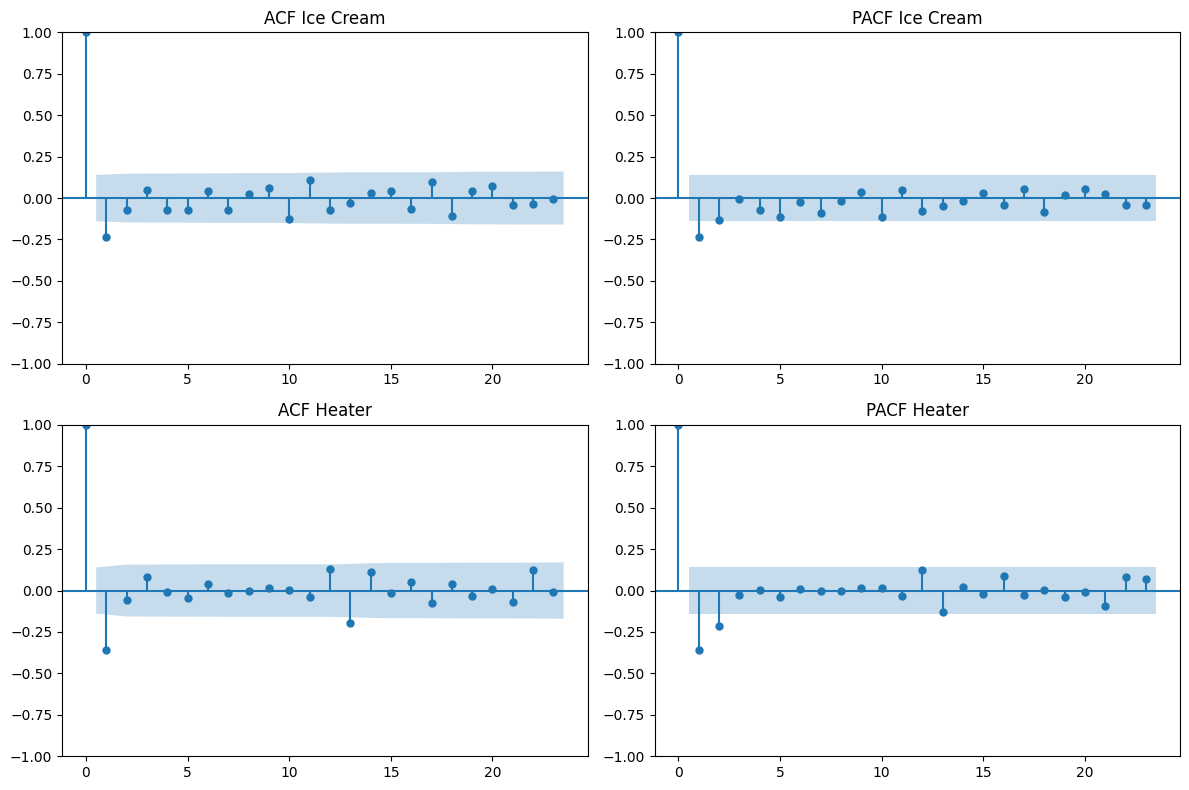

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -3.051     -2.910*     0.04733     -2.993*
1      -3.078*      -2.867    0.04605*      -2.992
2       -3.044      -2.762     0.04765      -2.930
3       -3.010      -2.658     0.04928      -2.868
4       -2.994      -2.571     0.05012      -2.822
5       -2.965      -2.472     0.05159      -2.765
6       -2.939      -2.376     0.05295      -2.711
7       -2.909      -2.275     0.05460      -2.652
8       -2.866      -2.162     0.05701      -2.581
9       -2.843      -2.068     0.05839      -2.529
10      -2.810      -1.965     0.06041      -2.467
11      -2.814      -1.898     0.06023      -2.442
12      -2.824      -1.838     0.05965      -2.424
13      -2.785      -1.729     0.06210      -2.357
14      -2.749      -1.622     0.06446      -2.292
--------------------------------------------------
  Summary of Regression Results

/Users/alanwong/miniconda3/envs/crypto/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/alanwong/miniconda3/envs/crypto/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


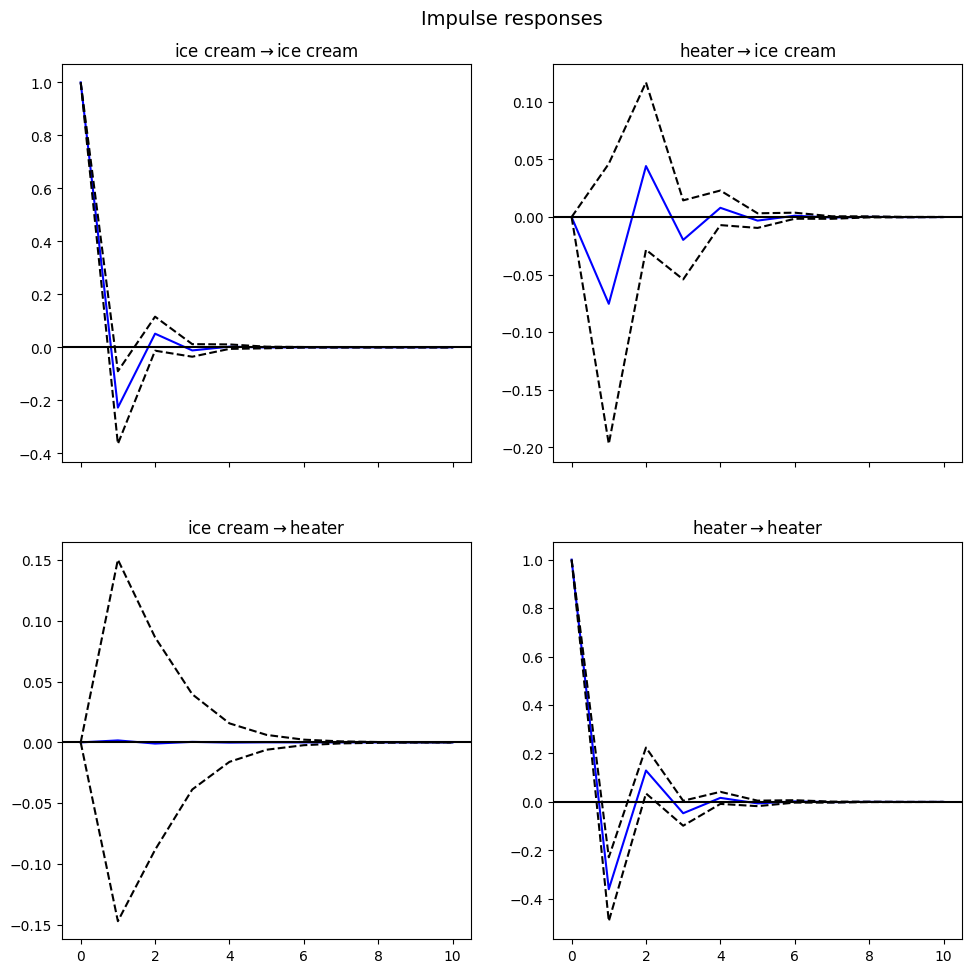

Forecast:
             ice cream    heater
2020-07-31   0.123520  0.216594
2020-08-31  -0.045735 -0.073047
2020-09-30   0.014571  0.031042
2020-10-31  -0.006983 -0.006365
2020-11-30   0.000736  0.007078
2020-12-31  -0.002032  0.002247
2021-01-31  -0.001038  0.003983
2021-02-28  -0.001395  0.003359
2021-03-31  -0.001267  0.003584
2021-04-30  -0.001313  0.003503
2021-05-31  -0.001297  0.003532
2021-06-30  -0.001302  0.003521


/var/folders/lb/ycbntly138n0xkt0fdrnnk_w0000gn/T/ipykernel_23859/1226338426.py:89: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), columns=data.columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import select_order

# Step 1: Load and Preprocess Data (your provided code)
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv',
                                  parse_dates=[0],
                                  index_col=0,
                                  date_format='%Y-%m')

ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

avgs = ice_cream_heater_df.mean()
devs = ice_cream_heater_df.std()

for col in ice_cream_heater_df.columns:
    ice_cream_heater_df[col] = (ice_cream_heater_df[col] - avgs.loc[col]) / devs.loc[col]

ice_cream_heater_df = ice_cream_heater_df.diff().dropna()

annual_volatility = ice_cream_heater_df.groupby(ice_cream_heater_df.index.year).std()

ice_cream_heater_df['ice_cream_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'ice cream'])
ice_cream_heater_df['heater_annual_vol'] = ice_cream_heater_df.index.map(lambda d: annual_volatility.loc[d.year, 'heater'])

ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] / ice_cream_heater_df['ice_cream_annual_vol']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] / ice_cream_heater_df['heater_annual_vol']

month_avgs = ice_cream_heater_df.groupby(ice_cream_heater_df.index.month).mean()

ice_cream_heater_df['ice_cream_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'ice cream'])
ice_cream_heater_df['heater_month_avg'] = ice_cream_heater_df.index.map(lambda d: month_avgs.loc[d.month, 'heater'])

ice_cream_heater_df['ice cream'] = ice_cream_heater_df['ice cream'] - ice_cream_heater_df['ice_cream_month_avg']
ice_cream_heater_df['heater'] = ice_cream_heater_df['heater'] - ice_cream_heater_df['heater_month_avg']

# Select only the relevant columns for VAR (the adjusted series)
data = ice_cream_heater_df[['ice cream', 'heater']]

# Step 2: Check Stationarity with ADF Test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('\n')

adf_test(data['ice cream'], 'Ice Cream')
adf_test(data['heater'], 'Heater')

# Step 3: Plot ACF and PACF for Lag Selection
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plot_acf(data['ice cream'], ax=axes[0, 0], title='ACF Ice Cream')
plot_pacf(data['ice cream'], ax=axes[0, 1], title='PACF Ice Cream')
plot_acf(data['heater'], ax=axes[1, 0], title='ACF Heater')
plot_pacf(data['heater'], ax=axes[1, 1], title='PACF Heater')
plt.tight_layout()
plt.show()

# Automatic Lag Selection using AIC/BIC
lag_order = select_order(data, maxlags=10, deterministic='ci')  # 'ci' for constant and seasonal
print(lag_order.summary())  # View AIC, BIC, etc.
selected_lag = lag_order.aic  # Use AIC for selection (or bic for more parsimonious)

# Step 4: Fit VAR Model
model = VAR(data)
results = model.fit(maxlags=selected_lag, ic='aic')
print(results.summary())

# Step 5: Diagnostics - Granger Causality
print('Granger Causality Tests:')
granger_ice_to_heater = grangercausalitytests(data[['heater', 'ice cream']], maxlag=selected_lag, verbose=True)
granger_heater_to_ice = grangercausalitytests(data[['ice cream', 'heater']], maxlag=selected_lag, verbose=True)

# Optional: Impulse Response Functions (IRF)
irf = results.irf(10)
irf.plot(orth=False)
plt.show()

# Optional: Forecast (e.g., 12 steps ahead)
forecast = results.forecast(data.values[-selected_lag:], steps=12)
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), columns=data.columns)
print('Forecast:\n', forecast_df)